### Задание
Собрать информацию о всех строящихся объектах на сайте "наш.дом.рф"

Cохранить результаты в pandas dataframe

Проверить состояние датафрейма и привести его в формат, позволяющий дальнейшее исследование данных: -- Привести колонки датафрейма к одному типу данных -- Проверить индекс, чтобы он соответствовал порядку строк -- Проверить наличие пропусков и в случае обнаружения, определить стратегию их обработки

Провести мини-исследование рынка строящейся недвижимости в одном или нескольких регионах с помощью pandas, matplotlib, seaborn, plotly и других инструментов. -- Рассчитать средние цены за квадратный метр по регионам. Важно чтобы пропуски не учитывались при расчете средней цены. -- Рассчитать объемы вводимого жилья по регионам и по годам. -- Сравнить этажность домов, количество квартир, жилую площадь, количество парковочных мест и цену за квадратный метр в разных регионах -- Визуализировать разброс, связь и распределение этих показателей по регионам -- Сделать выводы по каждому из расчетов и графиков

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns
from random import choice

In [3]:
data = pd.read_excel('house_data.xlsx')

In [28]:
data = data[['region','floorMax','objElemLivingCnt','objReady100PercDt','objSquareLiving','objElemParkingCnt','objPriceAvg']]
data.head()

,region,floorMax,objElemLivingCnt,objReady100PercDt,objSquareLiving,objElemParkingCnt,objPriceAvg
1,72,20.0,68,2022-12-31,6293.78,31,53109.0
2,72,12.0,65,2024-12-31,6248.51,0,45523.0
3,72,1.0,0,2024-12-31,0.00,125,50768.0
4,72,10.0,43,2024-12-31,4812.98,0,47886.0
5,72,12.0,44,2022-12-31,4297.44,41,55893.0


In [29]:
data = data.dropna()

In [30]:
len(data)

1380

In [31]:
price = data[data['objPriceAvg']!=0][['region', 'objPriceAvg']]

In [32]:
price.head()

,region,objPriceAvg
1,72,53109.0
2,72,45523.0
3,72,50768.0
4,72,47886.0
5,72,55893.0


In [9]:
avg_prise = price.groupby('region').objPriceAvg.mean()

In [10]:
avg_prise

region
1      62635.818182
2      53925.777778
3      46174.000000
5      24900.444444
10     52923.000000
          ...      
78    153131.965854
86     86697.875000
89     69323.666667
91    100638.125000
92    224598.000000
Name: objPriceAvg, Length: 69, dtype: float64

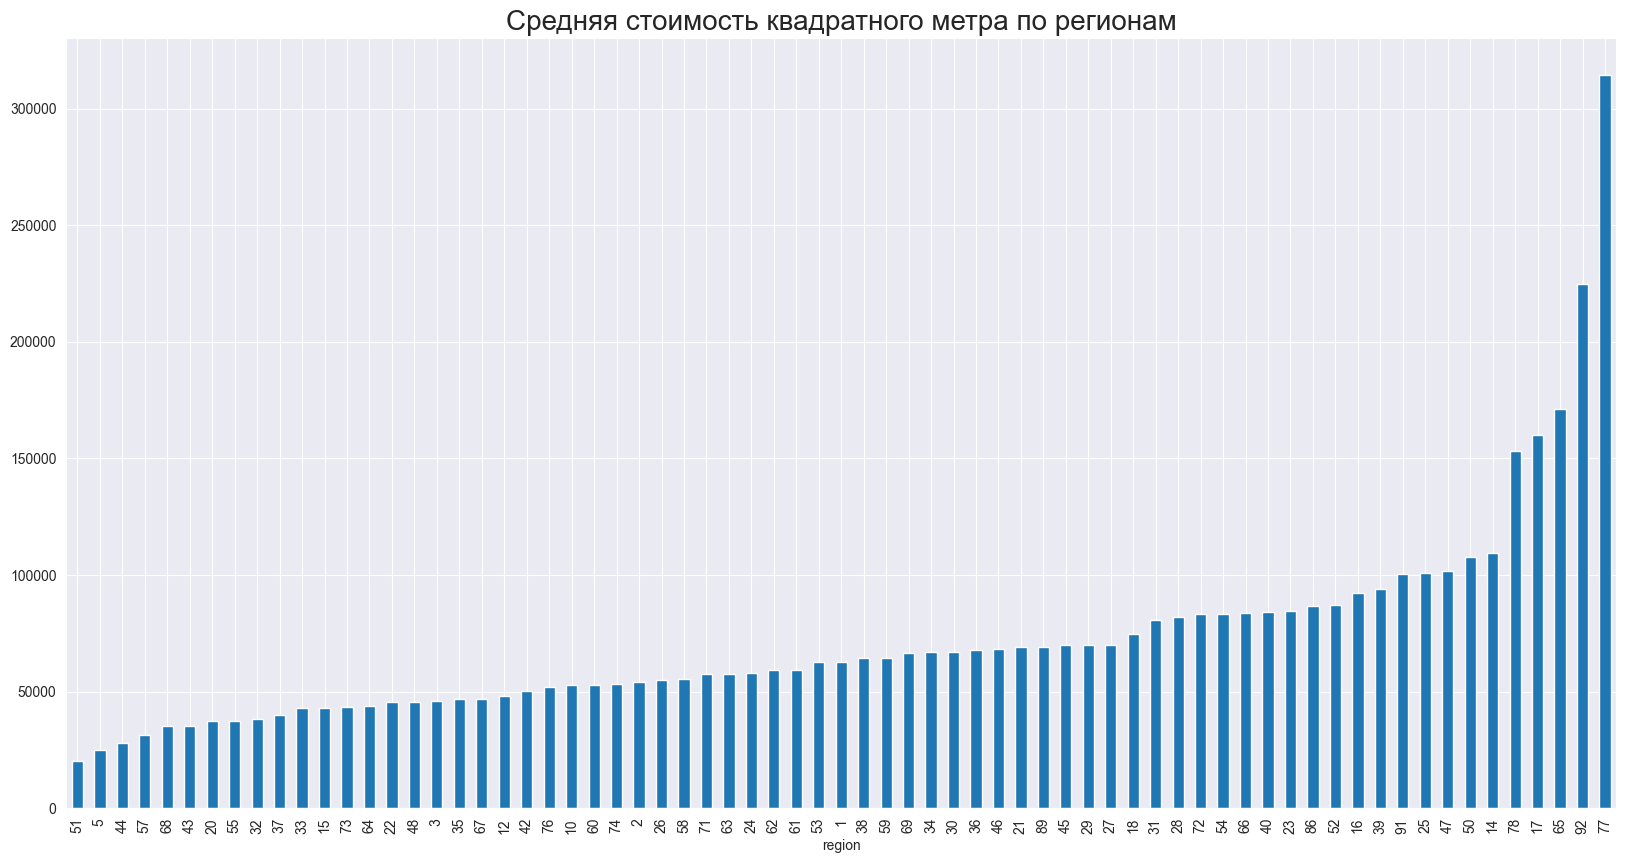

In [11]:
rcParams['figure.figsize'] = 20,10
avg_prise.sort_values(ascending=True).plot(kind='bar')
plt.title('Средняя стоимость квадратного метра по регионам', fontsize=20)
plt.show()

In [12]:
new_house = data[data['objReady100PercDt']!=0][['region', 'objReady100PercDt']]

In [13]:
new_house['objReady100PercDt'] = new_house['objReady100PercDt'].apply(lambda x: int(x[:4]))

In [14]:
new_house_group = new_house.groupby([new_house.region, new_house.objReady100PercDt]).size().unstack().fillna("-")

In [15]:
new_house_group

objReady100PercDt,2017,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031
region,,,,,,,,,,,,
1,-,-,9.0,13.0,-,-,-,-,-,-,-,-
2,-,-,4.0,2.0,3.0,-,-,-,-,-,-,-
3,-,-,1.0,-,-,-,-,-,-,-,-,-
5,-,3.0,-,5.0,-,-,1.0,-,-,-,-,-
10,-,-,3.0,-,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...
78,-,-,70.0,67.0,52.0,15.0,1.0,-,-,-,-,-
86,-,-,3.0,4.0,1.0,-,-,-,-,-,-,-
89,-,-,6.0,-,-,-,-,-,-,-,-,-


In [16]:
colomns = ['floorMax', "objElemLivingCnt","objSquareLiving","objElemParkingCnt"]

In [17]:
def statistic_region(kind_stat, data, title):
    reg_order = set(data['region'])
    stat = data[data[kind_stat]!=0][['region', kind_stat]]

    sns.catplot(x='region',y=kind_stat, data=stat, order=reg_order, jitter=0.1,height=4,aspect=4,kind='strip',dodge=True)
    plt.title(title, fontsize=20)


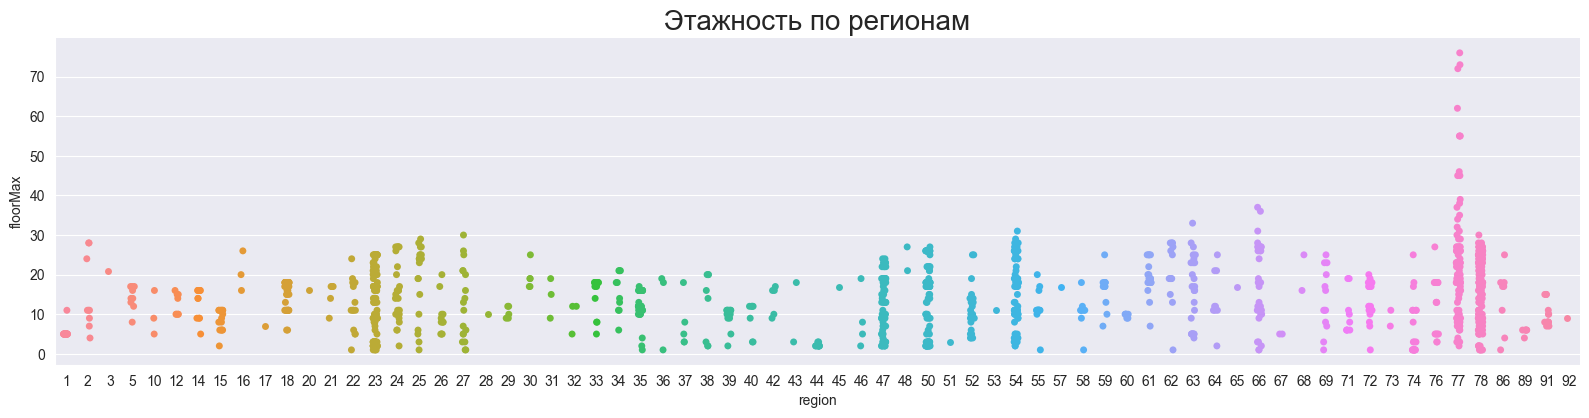

In [18]:
statistic_region('floorMax', data, 'Этажность по регионам')

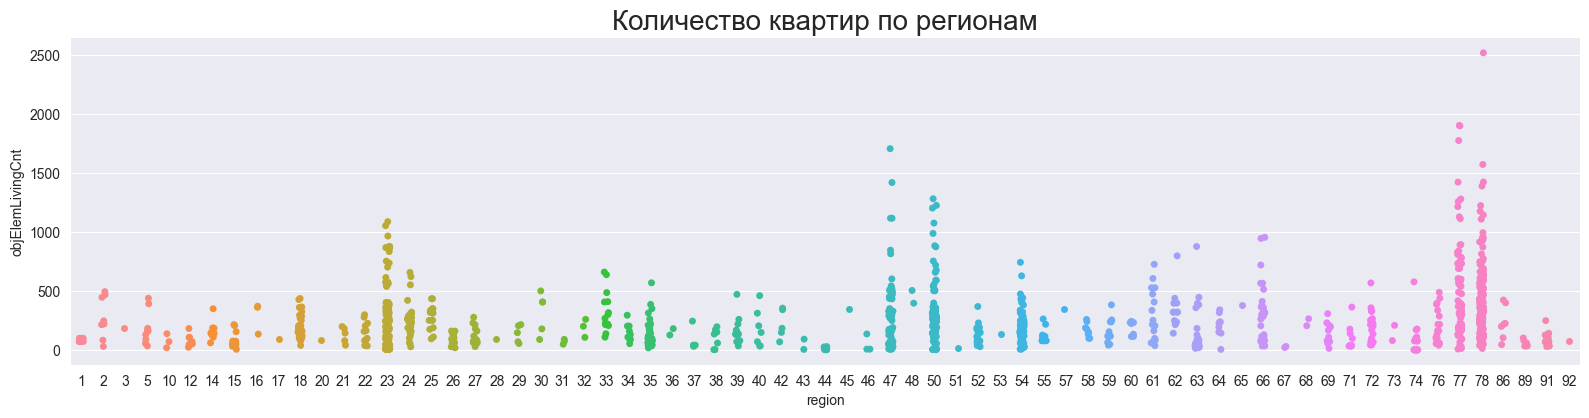

In [19]:
statistic_region('objElemLivingCnt', data, 'Количество квартир по регионам')

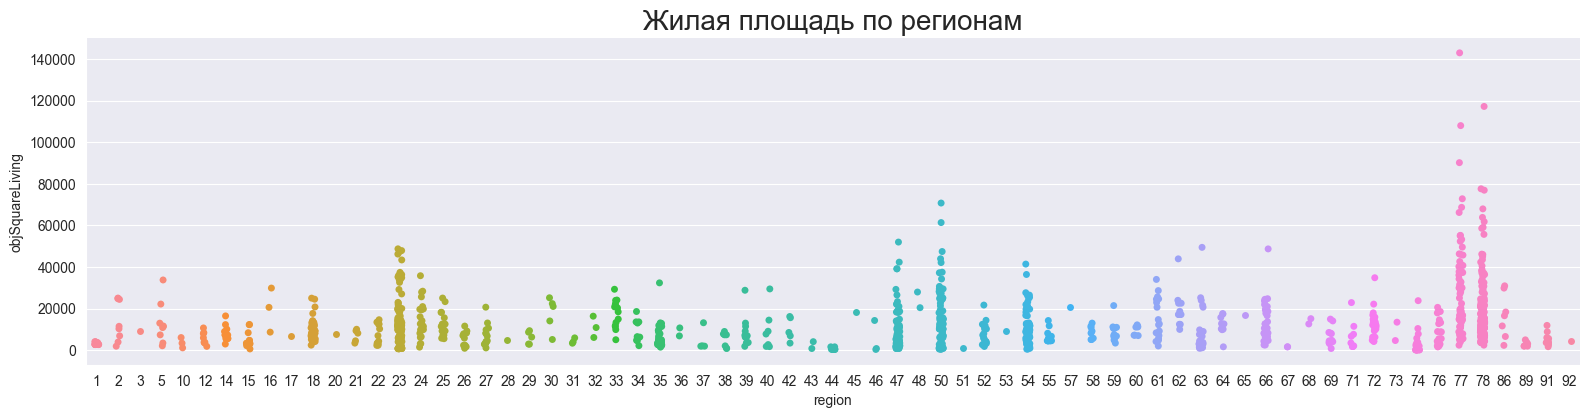

In [20]:
statistic_region('objSquareLiving', data, 'Жилая площадь по регионам')

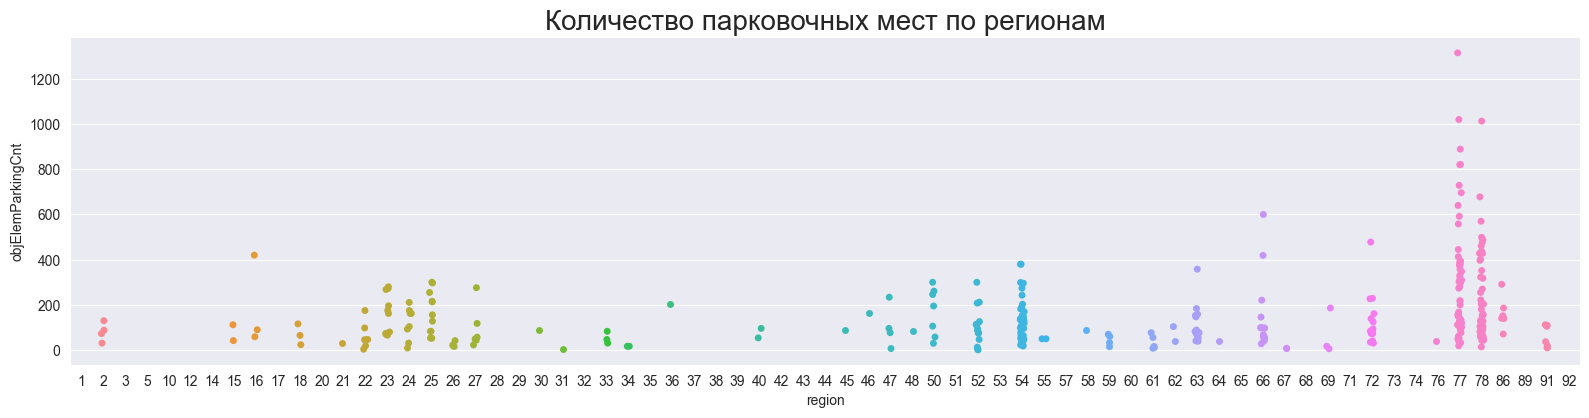

In [21]:
statistic_region('objElemParkingCnt', data, 'Количество парковочных мест по регионам')

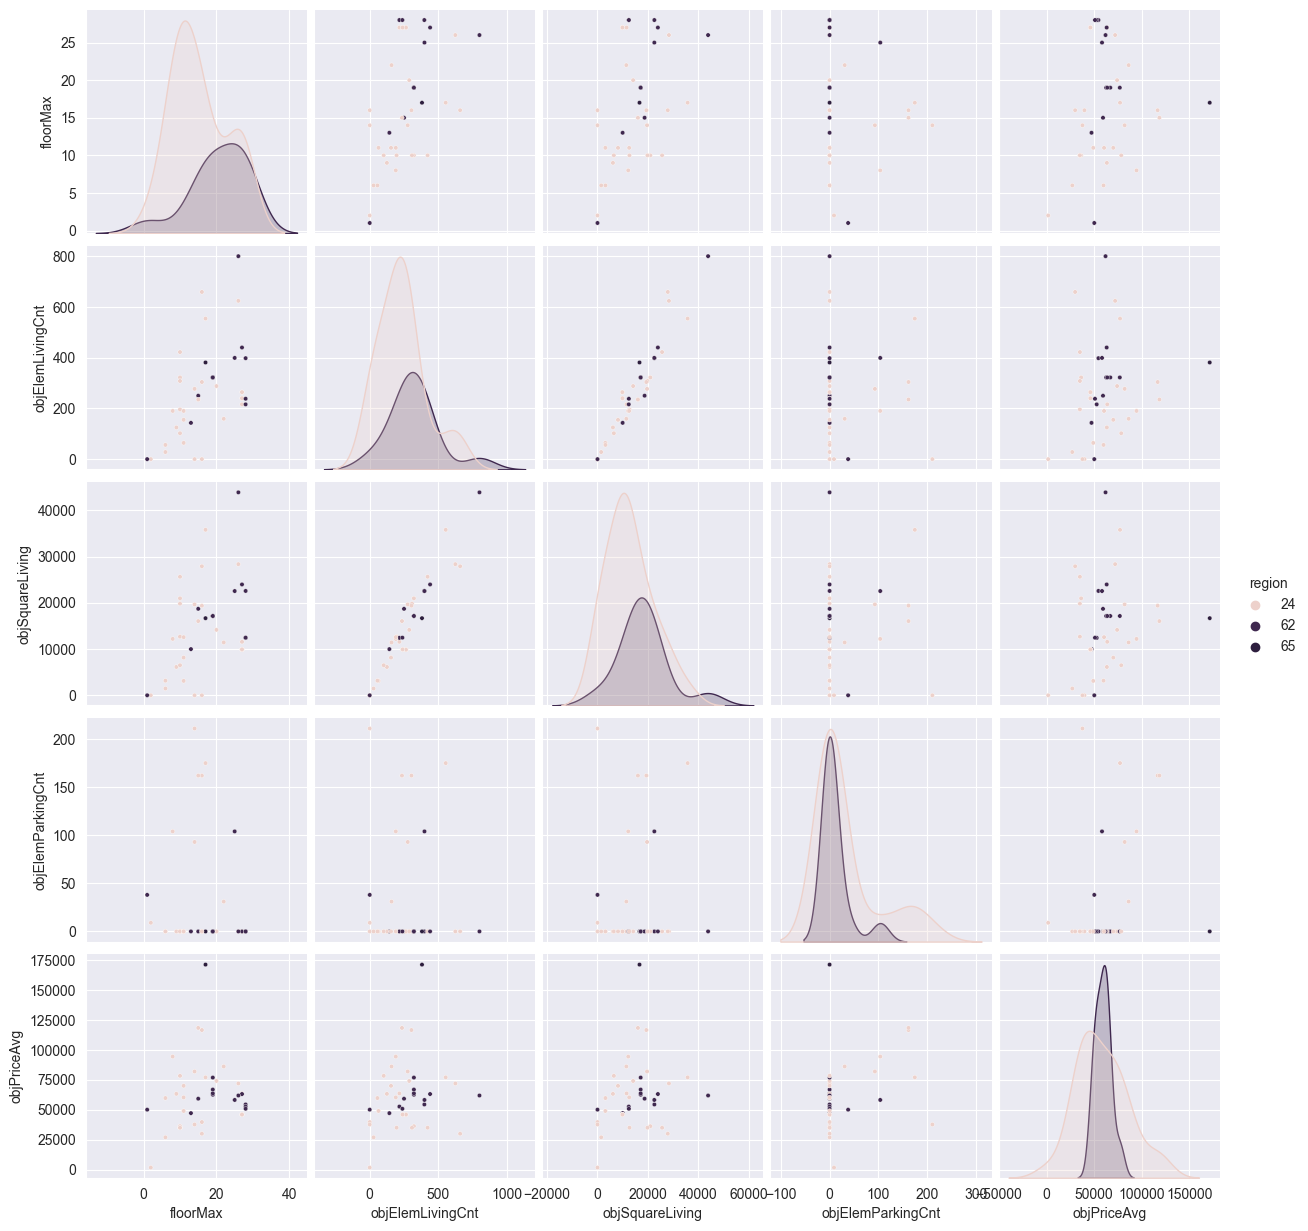

In [40]:
region_set = list(set(data["region"]))

selected_regions = list()

for _ in range(3):
    region = choice(region_set)
    region_set.remove(region)
    selected_regions.append(region)

df = data[data.region.isin(selected_regions)]

sns.pairplot(df, hue="region", plot_kws={"s": 10})